<a href="https://colab.research.google.com/github/Bruno-Messias/data_science_visagio/blob/main/Series_Temporais_Teoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Modelos de séries temporais - Teoria</center>
___

## Conteúdo
1. [Definição do problema](#intro) <br>
2. [Séries temporais e Pandas](#ts_pandas) <br>
3. [Divisão de treino/validação/teste](#data_split) <br>
4. [Relembrando: métricas de avaliação do modelo](#metrics)
5. [Modelagem](#models) <br>
[Saiba Mais](#digdeeper)

<a id="dsprecap"></a>
## Data Science Pipeline (DSP) recap
1. Definição do Problema / Definição do Escopo
2. Definição das Métricas de Sucesso
3. Definição dos Dados Necessários
4. Aquisição de Dados
5. Pré-processamento de Dados
6. Análise Exploratória de Dados (E.D.A.)
7. <i>Feature Engineering</i>
8. Construção e Avaliação do Modelo
9. Comunicação dos Resultados
10. Implantação
11. Monitoramento e Manutenção

**Essa aula tratará principalmente do passo 8, para os casos de modelos de séries temporais.**

<a id="intro"></a>
## 1. Definição do problema

Na aula passada, estudamos como usar inteligência artificial para resolver problemas de regressão, prevendo variáveis de valor contínuo. 

Agora imagine uma situação hipotética em que você é um jovem cientista de dados e que seu sonho é comprar uma bela casa em Boston. Você já aprendeu como prever os preços desses bens, mas você ainda não possui todo o dinheiro necessário para comprá-los. Então nada de casa ou carro por enquanto!

Mesmo assim, você está ansioso para realizar seu sonho no futuro e você se lembra que existe uma coisa chamada **tempo**, que nem os físicos conseguem descrever com precisão sua causa, mas que tem influência em tudo. Nada resiste ao tempo, não é?

Então, como você pode usar o tempo a seu favor nesse caso? Você pode esperar até que o preço da sua casa dos sonhos de Boston caia e você tenha dinheiro pra comprar! Mas pensando bem, talvez não seja a melhor ideia.

E que tal se você construir um modelo de machine learning para prever quando e se o preço dos imóveis vai cair até você ter o dinheiro pra comprar? É melhor, mas existe uma coisa chamada inflação que pode te deixar frustrado.

Finalmente, você tem uma revelação: "é, talvez seja melhor se eu ficar rico primeiro". Essa é uma excelente ideia! Você pode até estar se perguntando como? ~Bom, se descobrir, me avisa~ Pff, essa é fácil! É só aplicar todo seu conhecimento recentemente adquirido para participar de um concurso de ciência de dados e conseguir esse dinheiro!

<img src="https://media.giphy.com/media/lptjRBxFKCJmFoibP3/giphy.gif" alt="drawing" width="300"/>

### 1.1 Séries temporais x outros modelos

Diferentemente dos modelos de classificação e regressão que vimos anteriormente, em um problema de série temporal, as nossas variáveis agora também variam ao longo do tempo e nosso objetivo em geral é prever resultados ao longo do tempo. Portanto, há diferenças na maneira como treinamos nosso modelo, pois o próprio tempo pode explicar parcialmente o comportamento da variável objetivo.

Existem algumas maneiras pelas quais as variáveis ​​podem exibir padrões ao longo do tempo:

**Autocorrelação:** pode ser vista como a semelhança entre as observações do conjunto de dados com relação a intervalos de tempo anteriores. Basicamente, ela é a correlação entre observações da mesma variável sobrepostas em diferentes valores de tempo.

**Sazonalidade:** refere-se a flutuações periódicas. Essa característica pode ser identificado por meio de coeficientes de autocorrelação. Por exemplo, o consumo de eletricidade é alto durante o dia e baixo durante a noite, ou as vendas online aumentam durante o Natal antes de desacelerar novamente, ou a temperatura atmosférica, que é maior no verão do que no inverno.

<img src="https://i.imgur.com/RZmaNlb.png" alt="drawing" height="400"/>

(OBS: iremos aprender mais para frente na aula como fazer a plotagem desse tipo de gráfico)

**Estacionariedade:** é uma característica importante de algumas séries temporais, que são chamadas estacionárias quando suas propriedades estatísticas são estáveis. Isso significa que sua média e variância são constantes e sua covariância é independente do tempo. Idealmente desejamos que os dados que trabalhamos sejam estacionários para o desenvolvimento de modelos, porém isso nem sempre ocorre, como por exemplo, para variáveis ​​que mudam tendências globais. Tomemos, por exemplo, o preço dos alimentos: na medida em que a inflação incorpora a depreciação da moeda, o preço dos produtos tende a subir em média.

Ainda assim, podemos aplicar algumas transformações para tornar as nossas séries estacionárias.

<a id="ts_pandas"></a>
## 2. Séries Temporais e Pandas

Nesse capítulo, vamos fazer algumas análises e manipulações de séries temporais. Ao longo do curso, já usamos muito a biblioteca Pandas, mas nessa aula veremos que o Pandas é também uma ótima ferramenta para lidar com séries temporais, porque tem diversas funções e métodos construídos para facilitar algumas operações comuns utilizadas.

### 2.1. Leitura e visualização inicial

Primeiro, temos que dizer ao Pandas que estamos de fato trabalhando com séries temporais. Para fazer isso, precisamos referenciar o índice do DataFrame para uma coluna de data. Abaixo, temos duas maneiras diferentes de fazer isso lendo os dados de uma série temporal de um csv.

Para esta primeira parte da aula, vamos usar a série histórica do preço de fechamento das ações do Google, que foi disponibilizado nos dados para o exercício.

Você também pode encontrar os dados históricos financeiros de outras empresas no site [Yahoo! Finance](https://finance.yahoo.com/quote/GOOG/history?period1=1468119600&period2=1562727600&interval=1d&filter=history&frequency=1d).

In [ ]:
# importando bibliotecas utilizadas
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
# Usando outro caminho para obter os csv do google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s /content/drive/MyDrive/Data\ Science/Entrega6 /mydrive
!ls /mydrive

dados  Series_Temporais_Exercicio.ipynb


In [ ]:
# carrega dados da série histórica do csv
google = pd.read_csv('/mydrive/dados/GOOG.csv')

# transforma coluna 'Date' para datetime, de modo que o Pandas possa reconhecê-la
google.Date = pd.to_datetime(google.Date)

# define coluna Date como indice
google.set_index('Date', inplace=True)
google.info()
google.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2014-07-10 to 2019-07-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-10,564.360535,575.011292,563.463013,569.536316,569.536316,1356700
2014-07-11,570.344116,579.259644,569.855469,577.594238,577.594238,1621700
2014-07-14,581.004822,583.607727,576.447388,583.268616,583.268616,1854000
2014-07-15,584.136230,584.201050,574.981384,583.178894,583.178894,1623000
2014-07-16,586.390076,586.788940,580.605957,581.064697,581.064697,1397100


Como você pode ver, o DataFrame tem um índice de tipo `DatetimeIndex`, com dados de 10/07/2014 a 09/07/2019. E voilá! Isso é o suficiente para o Pandas entender que estamos lidando com séries temporais. Na verdade, cada coluna pode ser considerada uma série temporal; elas apenas estão no mesmo DataFrame com um índice comum.

A segunda forma de ler os dados de uma série temporal é diretamente pelo método `pd.read_csv ()`, como consta abaixo:

In [ ]:
# lê o csv indicando que a coluna Date deve ser carregada com tipo data e usada como índice
google = pd.read_csv('/mydrive/dados/GOOG.csv', parse_dates=['Date'], index_col='Date')
google.info()
google.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2014-07-10 to 2019-07-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-10,564.360535,575.011292,563.463013,569.536316,569.536316,1356700
2014-07-11,570.344116,579.259644,569.855469,577.594238,577.594238,1621700
2014-07-14,581.004822,583.607727,576.447388,583.268616,583.268616,1854000
2014-07-15,584.136230,584.201050,574.981384,583.178894,583.178894,1623000
2014-07-16,586.390076,586.788940,580.605957,581.064697,581.064697,1397100


Como você pode ver, obtivemos os mesmos resultados fazendo isso em apenas uma linha de código.

Agora vamos tentar visualizar nossos dados. É muito simples fazer isso agora, basta chamar o método `.plot` diretamente do DataFrame.

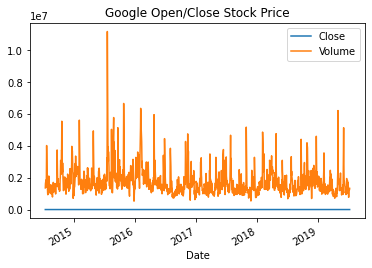

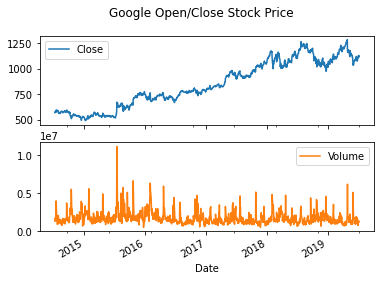

In [ ]:
# plota duas séries temporias em mesmo plot
google[['Close', 'Volume']].plot(title='Google Open/Close Stock Price')

# plota duas séries temporais em plots distintos
google[['Close', 'Volume']].plot(title='Google Open/Close Stock Price', subplots=True)

# imprime plots
plt.show()

Traçar duas séries no mesmo gráfico pode ser ruim se as duas séries têm magnitude diferente, como aconteceu no primeiro caso. A coluna Close acaba sendo uma linha reta já que o Volume é muito maior. Por causa disso, podemos separar os dois apenas adicionando o parâmetro ```subplots = True``` à instrução plot.

### 2.2. Frequências

Uma propriedade importante de séries temporais é a sua frequência. A frequência é o que define o intervalo de tempo entre dois registros consecutivos de uma série temporal, definindo o nível de refinamento da série temporal.

Ao definir uma frequência para a série temporal, o pandas cria automáticamente todas as datas que correspondem a essa frequência no intervalo de seus dados. As frequências podem ser:
- H para Horário
- D para Diário
- B para Dias Úteis
- W para Semanal
- M para Mensal
- Q para Trimestral
- A para Anual

Vamos ver como isso funciona.

In [ ]:
# define frequência diária
google_daily = google[['Close']].asfreq('D')
google_daily.info()
google_daily.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2014-07-10 to 2019-07-09
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1258 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


,Close
Date,
2014-07-10,569.536316
2014-07-11,577.594238
2014-07-12,NaN
2014-07-13,NaN
2014-07-14,583.268616


Como você pode ver, as linhas das datas de `2014-07-12` e `2014-07-12` foram inseridos pelo Pandas para termos os dados de todos os dias, já que definimos a frequência para diária. Mas pesquisando quais dias da semana foram esses, descobre-se que eles são sábado e domingo, o que era de se esperar, pois não há informações da bolsa para esses dias! Na verdade, existem quase 600 observações nulas por causa disso. Sabendo disso, é melhor usarmos a frequência dos dias úteis.

Apenas por curiosidade, vamos ver como é a frequência anual.

In [ ]:
# define frequência de dias uteis
google_bdaily = google[['Close']].asfreq('B')
google_bdaily.info()

# define frequencia anual
google_annually = google[['Close']].asfreq('A')
print(google_annually.head())

# define frequencia anual com preenchimento com ultimo valor nulo
google_annually_ffill = google[['Close']].asfreq('A', method='ffill')
print(google_annually_ffill.head())

# define frequencia anual com preenchimento com zeros
google_annually_fvalue = google[['Close']].asfreq('A', fill_value=0)
print(google_annually_fvalue.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2014-07-10 to 2019-07-09
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1258 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB
                  Close
Date                   
2014-12-31   524.958740
2015-12-31   758.880005
2016-12-31          NaN
2017-12-31          NaN
2018-12-31  1035.609985
                  Close
Date                   
2014-12-31   524.958740
2015-12-31   758.880005
2016-12-31   771.820007
2017-12-31  1046.400024
2018-12-31  1035.609985
                  Close
Date                   
2014-12-31   524.958740
2015-12-31   758.880005
2016-12-31     0.000000
2017-12-31     0.000000
2018-12-31  1035.609985


Bem melhor, agora, como podemos ver, a frequência de dias úteis deixou apenas cerca de 50 valores nulos que devem estar relacionados a feriados.

No caso de frequência anual, podemos ver que por padrão obtém o último dia de cada, gerando também alguns valores nulos. Mas podemos definir o atributo `method` para preencher os valores nulos com o último valor não nulo com `'ffill'` ou com o próximo valor não nulo com `'bfill'`. Se você quiser preencher com um valor, passe-o com o `'fill_value'` como fizemos.

### 2.3. Interpolação

Como acabamos de ver, a mudança de frequências produz alguns valores nulos nos dados, uma vez que cria observações para alguns dias que não tinham valores anteriormente.

Também aprendemos que podemos usar os parâmetros `'fill_value'` e `' method'` do método `DataFrame.asfreq ()` para imputar um valor fixo ou o último/próximo valor não nulo aos NAs, respectivamente.

Outra operação que podemos fazer para lidar com os NAs é interpolar. Basicamente, o que a interpolação faz é fornecer valores para NAs seguindo uma determinada regra e usando os valores não nulos mais próximos antes e depois de NA.

Por exemplo, digamos que temos esta lista com quatro valores: $[2, NaN, NaN, 8]$. Podemos substituir esses NAs por uma *interpolação linear*, ou seja, assumindo que todos os valores seguem uma linha de 2 a 8. Com isso, terminamos com a lista $[2, 4, 6, 8]$.

Existem difersos tipos diferentes de interpolação, que podem usar mais ou menos valores anteriores para estimar o valor nulo, e utilizar diferentes funções. No Pandas, podemos especificar o tipo desejado com o parâmetro `method`, da função `DataFrame.interpolate()`, como usamos na célula abaixo. Você pode ver todos os métodos disponíveis na [documentação da função interpolate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html).

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5767a052d0>,
      dtype=object)

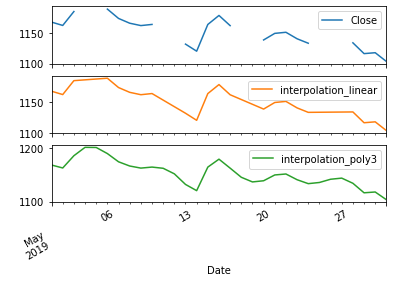

In [ ]:
# interpolação com método linear
google_daily['interpolation_linear'] = google_daily.Close.interpolate(method='linear')

# interpolação com método polinomial
google_daily['interpolation_poly3'] = google_daily.Close.interpolate(method='polynomial', order=3)

# imprime resultados
google_daily[['Close','interpolation_linear','interpolation_poly3']].loc['2019-05'].plot(subplots=True)

Como mostra o gráfico, na série temporal `google_daily` tínhamos alguns NAs. Em seguida, aplicamos uma interpolação com dois métodos diferentes, o que nos dá duas novas séries ligeiramente diferentes.

Não existe uma regra de ouro para escolher o método ao aplicar a interpolação. É importante entender cada método e pensar qual ajustaria melhor seus dados e, acima de tudo, experimentar!

### 2.4. Slicing

Uma prática muito frequente quando manipulamos dados de séries temporais é o corte do data frame, denominado 'slicing'. Com o Pandas, essa atividade é simplificada, de modo que pode-se simplesmente passar um ano, ano-mês ou intervalo entre colchetes para filtrar os dados. Você ainda pode usar ```.loc[]``` para selecionar uma data específica. Dê uma olhada abaixo.


734.150024


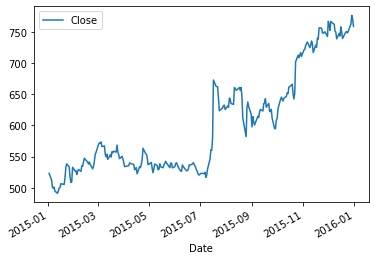

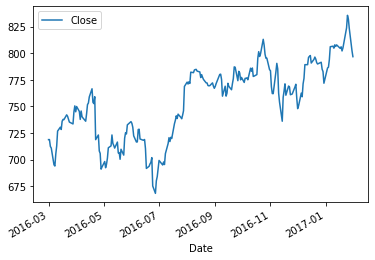

In [ ]:
# copia a série
google_close = google[['Close']].copy()

# seleciona apenas dados de 2015
google_close['2015'].plot()

# seleciona os de março/2016 a fevereiro/2017. Note que é um intervalo fechado (inclusivo nas pontas)
google_close['2016-3': '2017-1'].plot()

# seleciona dados de uma data específica
print(google.loc['2016-6-1', 'Close'])

plt.show()

### 2.5. Deslocamento - _Shifting_

Frequentemente, ao usar séries temporais, precisamos comparar um valor com relação a outro. Por exemplo: se eu quisesse saber quanto mudou o preço das ações de um dia para o outro? Aqui comumente deslocamos as séries temporais para facilitar a operação.

Basicamente, o deslocamento (no Pandas com a função [`DataFrame.shift()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html)) move todos os valores da série temporal em uma dada direção. Para nosso exemplo, poderíamos deslocar todos os valores em uma posição e, em seguida, usar operações para comparar esses valores. Abaixo, fazemos exatamente isso.

In [ ]:
# move valores um período pra frente
google_close['shifted'] = google_close.Close.shift() # default: periods=1

google_close.head(3)

,Close,shifted
Date,,
2014-07-10,569.536316,NaN
2014-07-11,577.594238,569.536316
2014-07-14,583.268616,577.594238


Como você pode ver, o primeiro valor dos dados deslocados é NaN, pois não havia nenhum registro anterior para ser colocado naquele local. E se quiséssemos deslocar para outra direção?

In [ ]:
# move valores um período para trás 
google_close['lagged'] = google_close.Close.shift(periods=-1)

google_close.tail(3)

,Close,shifted,lagged
Date,,,
2019-07-05,1131.589966,1121.579956,1116.349976
2019-07-08,1116.349976,1131.589966,1124.829956
2019-07-09,1124.829956,1116.349976,NaN


Mais uma vez, o último valor dos dados defasados é NaN porque não houve registros depois disso.

Agora podemos calcular a mudança entre um dia e outro com os dados deslocados.

In [ ]:
# divide preço de fechamento pela coluna deslocada para obter a variação
google_close['change'] = google_close.Close.div(google_close.shifted)

# subtrai 1 e multiplica por 100 para obter retorno percentual
google_close['return_pct'] = google_close.change.sub(1).mul(100)

google_close.head()

,Close,shifted,lagged,change,return_pct
Date,,,,,
2014-07-10,569.536316,NaN,577.594238,NaN,NaN
2014-07-11,577.594238,569.536316,583.268616,1.014148,1.414821
2014-07-14,583.268616,577.594238,583.178894,1.009824,0.982416
2014-07-15,583.178894,583.268616,581.064697,0.999846,-0.015383
2014-07-16,581.064697,583.178894,572.159119,0.996375,-0.362530


Fácil, não é? Na verdade, para diferença e mudança percentual, existem métodos predefinidos. Você só precisa passar por quantos períodos deseja que seus dados sejam deslocados. Dê uma olhada abaixo.

In [ ]:
# diferença absoluta entre dois dias adjacentes
google_close['diff'] = google_close.Close.diff()

# diferença absoluta para dois dias com distancia de 3 dias entre si
google_close['diff_3d'] = google_close.Close.diff(3)

# variação percentual entre dois dias adjacentes
google_close['pct_change'] = google_close.Close.pct_change().mul(100)

# variação percentual para dois dias com distancia de 3 dias entre si
google_close['return_3d'] = google_close.Close.pct_change(3).mul(100)

google_close[['Close', 'diff', 'diff_3d', 'return_pct', 'pct_change', 'return_3d']].head()

,Close,diff,diff_3d,return_pct,pct_change,return_3d
Date,,,,,,
2014-07-10,569.536316,NaN,NaN,NaN,NaN,NaN
2014-07-11,577.594238,8.057922,NaN,1.414821,1.414821,NaN
2014-07-14,583.268616,5.674378,NaN,0.982416,0.982416,NaN
2014-07-15,583.178894,-0.089722,13.642578,-0.015383,-0.015383,2.395383
2014-07-16,581.064697,-2.114197,3.470459,-0.362530,-0.362530,0.600847


### 2.6. Resample

Resample é a operação de alterar a frequência de seus dados para uma frequência inferior (*downsampling*) ou superior (*upsampling*).

Em geral, *upsampling* não é muito comum, e geralmente envolve interpolação ou outros métodos mais complexos de preenchimento, que envolvem um maior entendimento do problema.

Nessa aula, vamos nos concentrar na redução da resolução que é comumente usada com alguma função de agregação, como uma forma de agrupamento para uma série temporal.

O que acontece é que você passa uma frequência para o método [`.resample ()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) e ele agrupa todos os valores naquele novo período, então você pode aplicar uma função a ele, criando um único valor a partir deles. Isso geralmente é usado para fazer uma versão mais suave de sua série. Fora as frenquências que já vimos, algumas frequências que aceitam resampling são:
- M por mês
- MS para início do mês
- BM para o mês comercial
- BMS para início do mês comercial

Em geral, as funções de agregação mais usadas são funções estatísticas (como valor máximo, mínimo, média ou mediana) que descrevem em apenas um valor o conjunto de dados que desejamos reduzir.

Veja a seguir onde calculamos a mediana de um período da semana e a média de um período que começa no primeiro dia útil do mês.

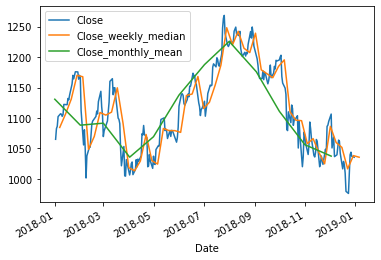

In [ ]:
# apenas dados de 2018
google_18 = google[['Close']]['2018']

# aplica média e mediana
monthly_median = google_18.resample('W').median().add_suffix('_weekly_median')
monthly_mean = google_18.resample('BMS').mean().add_suffix('_monthly_mean')

# plota no mesmo eixo
axes = google_18.plot()
monthly_median.plot(ax=axes)
monthly_mean.plot(ax=axes)

plt.show()

Podemos notar que, quando fazemos o *downsampling* de uma série temporal, estamos diminuindo a "resolução" dos dados, que consequentemente apresenta menos detalhes do que os dados originais.

Você pode estar se perguntando: "mas, se um modelo de predição tem melhor desempenho com uma maior quantidade de dados, para que eu quero reduzir a resolução dos meus dados?". Bom, na maioria das vezes, aplicamos o downsample na visualização da série temporal, para uma melhor visão geral do seu comportamento. Ainda assim, alguns modelos de séries temporais não performam tão bem quando os dados apresentam muito ruído, ou variam muito em um curto intervalo de tempo, então alguns modelos se beneficiam de treinar com dados com menor resolução.

### 2.7. Funções de Janela (_Window Functions_)

A função de janela é uma funcionalidade muito útil ao trabalhar com séries temporais. Basicamente, o que ele faz é, realizar uma agregação dos dados sobre uma partição de valores (janela) da série temporal que desliza ao longo de todos os dados.


Para cada amostra da série temporal, a seguinte operação é realizada:
1. identificar a partição da série temporal daquela amostra (janela)
2. calcular métricas de agregação para a janela
3. criar uma nova série temporal das métricas

A ideia é semelhante à redução da resolução (*downsampling*), com a diferença de que, nas funções de janela, um registro pode influenciar em várias janelas (dependendo do tamanho da janela), enquanto no *downsampling*, cada registro aparece em um e apenas um compartimento, pois não há referência móvel na redução da resolução.

Com isso, existem dois tipos de janelas:
- Janelas Rolantes (ou _Rolling Windows_): janela de tamanho fixo do registro atual que 'rola' conforme a referência muda
- Janelas de Expansão (ou _Expanding Windows_): a janela contém todos os registros até a referência

#### 2.7.1. Janelas Rolantes (_Rolling Windows_)
As janelas rolantes (ou deslizantes) aplicam uma função de agregação a uma janela de tamanho fixo que desliza pela série. A imagem abaixo mostra uma visualização de como funciona uma janela deslizante, onde a cada iteração uma parte da série temporal é coberta pela janela.

<img src="https://docs.wavefront.com/images/5sec_moving_window.png" alt="drawing" width="600"/>

Imagine que a cada iteração, uma operação é feita sobre a janela, como por exemplo o cálculo da média.

Vamos entender como isso é feito na prática com a função [`DataFrame.rolling()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html). Para cada observação, calcularemos o valor médio das últimas 3 observações e também, separadamente, o valor médio dos últimos 3 dias.

In [ ]:
obs_window = google.Close.rolling(window=3).mean() # número fixo de observações (janela de observação)

period_window = google.Close.rolling(window='3D').mean() # período fixo (janela de período)

# agregando as duas séries em um DataFrame para visualização do head
window = pd.concat([google.Close, obs_window.to_frame().add_suffix('_obs_mean'), period_window.to_frame().add_suffix('_per_mean')], axis=1)
window.info()
window.head(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2014-07-10 to 2019-07-09
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           1258 non-null   float64
 1   Close_obs_mean  1256 non-null   float64
 2   Close_per_mean  1258 non-null   float64
dtypes: float64(3)
memory usage: 79.3 KB


,Close,Close_obs_mean,Close_per_mean
Date,,,
2014-07-10,569.536316,NaN,569.536316
2014-07-11,577.594238,NaN,573.565277
2014-07-14,583.268616,576.799723,583.268616
2014-07-15,583.178894,581.347249,583.223755
2014-07-16,581.064697,582.504069,582.504069
2014-07-17,572.159119,578.800903,578.800903
2014-07-18,593.450684,582.224833,582.224833
2014-07-21,587.856018,584.488607,587.856018
2014-07-22,593.111633,591.472778,590.483825


Como podemos ver, o uso da janela de observação produz NAs até que tenhamos pelo menos o tamanho da janela para aplicar a média, enquanto a janela do período se ajusta até ter a janela do buraco para calcular a média.

Pode-se notar que existem algumas observações que possuem os mesmos valores para ```Close_obs_mean``` e ``` Close_per_mean``` e outras que não. A razão para isso são os dias sem informações de fechamento, já que a janela de observação pula esses dias enquanto a janela de período os conta. Portanto, se não houver dias sem negociação (finais de semana ou feriados) na janela do período, os dois valores serão iguais.

Podemos calcular múltiplas métricas com a mesma janela rolante usando ```agg``` ou armazenando a janela rolante em uma variável e usando-a várias vezes. Mostramos os duas formas:

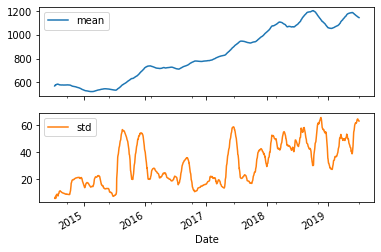

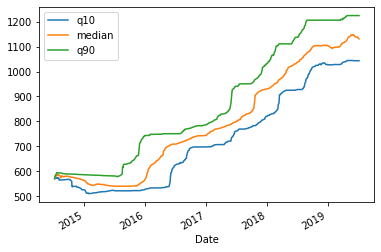

In [ ]:
# Método 1
r = google.Close.rolling('90D').agg(['mean', 'std'])    # calculo de média e desvio padrao
r.plot(subplots = True)                                 # plot separadamente

# Método 2
rolling = google.Close.rolling('360D')                  # armazena janela em variavel
q10 = rolling.quantile(.1).to_frame('q10')              # calculo do 10 quartil (q10)
median = rolling.median().to_frame('median')            # cálculo da mediana
q90 = rolling.quantile(.9).to_frame('q90')              # calculo do 90 quartil (q90)
pd.concat([q10, median, q90], axis=1).plot()            # plot

#### 2.7.2. Janelas de Expansão - _Expanding Windows_

As janelas de expansão levam todas as observações até a referência para calcular as métricas. Funciona com o método [`expanding`](](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.expanding.html)) que é semelhante ao `rolling`, mas não precisa do tamanho da janela. 

Abaixo, usamos a janela de expansão para somar os valores em um DataFrame com dados inteiros de 1 a 10. Observe que fazemos isso de duas formas: com o método de expansão e com `.cumsum()` que serve como o agregação de `.expanding()` e ```.sum()```. Também temos ```.cumprod()```, ```.cummin()``` e ```.cummax()``` que seguem a mesma idéia.

In [ ]:
df = pd.DataFrame({'data': range(1, 11)})          # cria dataframe
df['expanding sum'] = df.data.expanding().sum()    # expanding()
df['cumulative sum'] = df.data.cumsum()            # cumsum()
df.head()

,data,expanding sum,cumulative sum
0,1,1.0,1
1,2,3.0,3
2,3,6.0,6
3,4,10.0,10
4,5,15.0,15


Em outro exemplo, podemos calcular os valores máximo e mínimo para o preço das ações do Google até esse ponto, como fazemos abaixo.

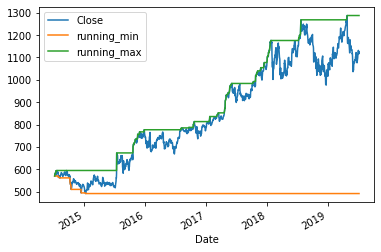

In [ ]:
google['running_min'] = google.Close.expanding().min()
google['running_max'] = google.Close.expanding().max()
google[['Close', 'running_min', 'running_max']].plot()

<a id="data_split"></a>
## 3. Divisão de treino/validação/teste
Embora esta seção já tenha sido apresentada nas duas últimas lições, aqui apresentamos algumas novas ideias para que possamos explicar a influência do tempo nas divisões de sets de treino, validação e teste.


### 3.1. Divisão Temporal
O impacto do tempo no comportamento dos dados é algo que devemos considerar para cada modelo, portanto, podemos (e devemos) aplicar o que discutiremos aqui aos problemas de classificação e regressão também. Só deixamos essa discussão para esta aula porque as séries temporais, como o nome diz, exibem comportamentos influenciados pelo tempo.

O principal problema com a divisão treino/teste que usamos antes é que ela é aleatória. Isso significa que escolhemos aleatoriamente um subconjunto de nossos dados para treinar e outro no qual testamos nosso modelo. Este método é baseado em uma forte suposição de que as observações são independentes entre si, o que significa que o resultado de uma observação não está correlacionado ao resultado de outras.

Mas ao usar a série temporal, isso deixa de ser verdade. Por exemplo, pegue o último gráfico que fizemos na seção anterior e tente informar o preço das ações do Google em 17/10/2018. Você não pode dizer o valor exato porque o gráfico é muito pequeno, mas o que você pode dizer é que está mais próximo de 1100 do que de 600 apenas porque o valor médio para o final de 2018 está em torno de 1100, enquanto o valor 600 não acontecia desde 2015. Os valores dos dados das séries temporais tendem a estar mais próximos dos valores das observações próximas em termos de tempo.

Nesse caso, usarmos uma divisão aleatória dos dados de treino e teste, quando o modelo tenta prever uma observação de 2017 que caiu no conjunto de teste, ele conseguiria uma estimativa mais enviesada, pois viu os dados de 2014 a 2019 no conjunto de treinamento e os usou como uma pista, ficando boas as métricas de acurácia para esse modelo. Contudo, quando colocamos esse modelo em produção, ele provavelmente terá métricas de acurácia piores, uma vez que o modelo não possui dados futuros para usar como pista e será mais difícil de realizar uma boa previsão.

É por isso que devemos usar uma divisão temporal para separar os conjuntos de treino e teste. Em geral, escolhemos uma data de referência e usamos as amostras anteriores a ela para treinar e depois dela para testar. Fazendo isso, podemos assegurar que o modelo nunca viu no treinamento uma observação que ocorre depois daquela com que está sendo testado, como acontecerá na vida real.

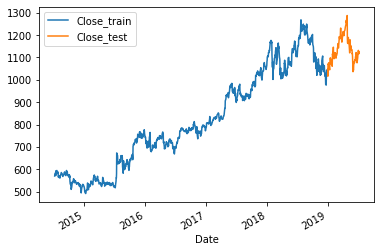

In [ ]:
train = google[:'2018-12']
test = google['2019-01':]

pd.concat([train.add_suffix('_train').Close_train, test.add_suffix('_test').Close_test], axis=1, sort=False).plot()

### 3.2. Validação Cruzada (_Cross Validation_)

Assim que tivermos nosso conjunto de treino, precisamos usar um conjunto de validação ou validação cruzada para fazer o ajuste de hiperparâmetros, como fizemos em outras lições. <br>
No caso de um conjunto de validação, precisamos dividir os dados temporariamente mais uma vez.

Quando falamos sobre validação cruzada para séries temporais, temos dois métodos que são mais utilizados, assim como vimos nas funções de janela: rolar ou expandir. A ideia é exatamente a mesma, rolando usaremos um teste de tamanho fixo e rolaremos pelos dados, enquanto a expansão usará todos os dados anteriores. A imagem abaixo deve facilitar o entendimento.

<img src="https://i.imgur.com/d24PIiL.png" height="250"/>


Você pode aprender como realizar os dois métodos de validação cruzada nas células a seguir, onde usamos a função [`TimeSeriesSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html) da biblioteca `scikit-learn`.

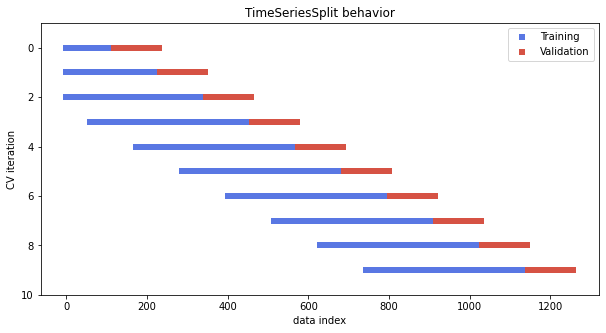

In [ ]:
# janela rolante
# utiliza histórico fixo para treino
from sklearn.model_selection import TimeSeriesSplit
cv = TimeSeriesSplit(n_splits=10, max_train_size=400)

fig, ax = plt.subplots(figsize=(10, 5))
for index, (train, test) in enumerate(cv.split(google)):
    # Plota índices de treino e teste
    l1 = ax.scatter(train, [index] * len(train), c=[plt.cm.coolwarm(.1)], marker='_', lw=6)
    l2 = ax.scatter(test, [index] * len(test), c=[plt.cm.coolwarm(.9)], marker='_', lw=6)
    ax.set(ylim=[10, -1], title='TimeSeriesSplit behavior', xlabel='data index', ylabel='CV iteration')
    ax.legend([l1, l2], ['Training', 'Validation'])

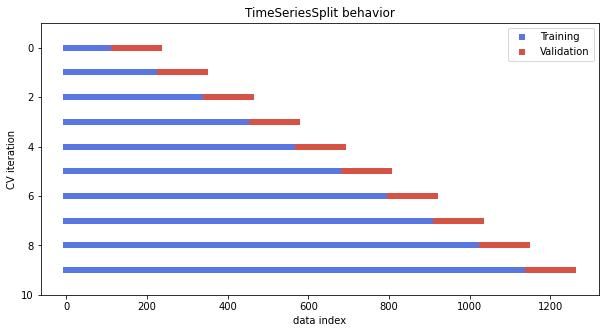

In [ ]:
# métodp de janela de expansão
# using all history to train
from sklearn.model_selection import TimeSeriesSplit
cv = TimeSeriesSplit(n_splits=10)

fig, ax = plt.subplots(figsize=(10, 5))
for index, (train, test) in enumerate(cv.split(google)):
    # Plota índices de treino e teste
    l1 = ax.scatter(train, [index] * len(train), c=[plt.cm.coolwarm(.1)], marker='_', lw=6)
    l2 = ax.scatter(test, [index] * len(test), c=[plt.cm.coolwarm(.9)], marker='_', lw=6)
    ax.set(ylim=[10, -1], title='TimeSeriesSplit behavior', xlabel='data index', ylabel='CV iteration')
    ax.legend([l1, l2], ['Training', 'Validation'])

O método da janela de expansão é usado com mais frequência, principalmente pois os modelos se beneficiam com a adição de uma maior quantidade de dados para treino. Contudo, o método da janela rolante pode ser utilizado quando a quantidade de dados for muito grande, para que o treinamento seja mais rápido, ou de acordo com restrições do problema.

Imagine que gostaríamos de prever o tempo de entrega de um pedido. E temos um dataset onde cada linha representa um pedido, representado por diversas variáveis. Como um requisito do negócio, deseja-se construir um modelo baseado nos pedidos do mês passado, e depois aplicá-lo para prever o tempo de entrega dos pedidos da próxima semana.

A fim de melhor representar o mundo real do modelo em produção, devemos utilizar uma janela deslizante de um mês para treinar nossos modelos e depois testá-los em novos dados capturados na semana seguinte.

<a id="metrics"></a>
## 4. Relembrando: métricas de avaliação do modelo

Como você pode imaginar, as métricas para avaliar um modelo de série temporal são semelhantes daquelas usadas para avaliar modelos de regressão, uma vez que os modelos continuam sendo regressivos, mas com o tempo passando a fazer parte do modelo. Para modelos de série temporal, geralmente usamos uma das seguintes métricas:
* MAPE (*Mean Absolute Percentage Error*)
* MAE (*Mean Absolute Error*)
* MSE (*Mean Squared Error*)
* RMSE (*Root Mean Squared Error*)
* R² (*R Squared*)


#### MAE (*Mean Absolute Error*, ou erro absoluto médio)

MAE é a média da diferença absoluta entre os valores previstos e o valor observado. O MAE é uma pontuação linear, o que significa que todas as diferenças individuais são ponderadas igualmente na média. Por exemplo, a diferença entre 10 e 0 será o dobro da diferença entre 5 e 0 (o mesmo não é verdade para RMSE, apresentado abaixo). Matematicamente, é calculado usando a seguinte fórmula:

<img src="https://i.imgur.com/4pawj0n.png" height="100"/>


#### RMSE (Root Mean Squared Error, ou raiz do erro quadrático médio)

A raíz do erro quadrático médio (RMSE) é uma métrica que também mede a magnitude média do erro. Porém, como os erros são elevados ao quadrado antes de serem calculados, o RMSE atribui um peso relativamente alto aos erros maiores. Isso significa que o RMSE é mais útil quando erros grandes (outliers) são particularmente indesejáveis. Ele também tem a vantagem de ter a mesma unidade da variável resposta, ao contrário do MSE, o que torna ele mais fácil de ser interpretado.

<img src="https://i.imgur.com/0DuRiEK.png" height="100"/>


#### MAPE (Mean Absolute Percentage Error ou erro percentual médio absoluto)

O erro percentual médio absoluto (MAPE) é uma medida de acurácia de previsão. Ela expressa a precisão como uma porcentagem, e é definida pela fórmula:

O erro percentual médio absoluto (MAPE) é uma medida de acurácia de previsão. Ele é uma medida de erro relativo que usa valores absolutos. O MAPE tem duas vantagens: primeiro, os valores absolutos evitam que os erros positivos e negativos se anulem. Em segundo lugar, como os erros relativos não dependem da escala da variável dependente, essa medida permite comparar a acurácia da previsão entre dados de séries temporais com escalas diferentes.

Ele expressa a acurácia como uma porcentagem e é definido pela fórmula:

<img src="https://i.imgur.com/SVsaNJM.png" height="100"/>

A seguir há algumas páginas para melhor entendimento desses conceitos, mas lembre-se que a escolha da métrica de erro é de extrema importância para a modelagem!

1. [Medium](https://towardsdatascience.com/how-to-select-the-right-evaluation-metric-for-machine-learning-models-part-1-regrression-metrics-3606e25beae0): How to select the Right Evaluation Metric for Machine Learning Models
2. [Dataquest](https://www.dataquest.io/blog/understanding-regression-error-metrics/): Understanding Regression Error Metrics in Python

<a id="models"></a>
## 5. Modelagem

### 5.1. Métodos Clássicos

Antes de explorar os métodos de aprendizado de máquina para séries temporais, é uma boa ideia garantir que você tenha experimentado os métodos clássicos de previsão de séries temporais lineares. Os métodos clássicos de previsão de séries temporais podem ser focados em relações lineares, no entanto, eles são sofisticados e têm um bom desempenho em uma ampla gama de problemas, assumindo que seus dados estão adequadamente preparados e o método está bem configurado.

![img](https://media.giphy.com/media/zZeCRfPyXi9UI/giphy.gif)

Os chamados métodos clássicos são diversas técnicas de previsão baseadas não só em valores previamente observados, mas também estatísticas significativas e outras características de dados anteriores. Ao contrário das técnicas de aprendizado de máquina, os métodos apresentados a seguir não usam fatores externos para explicar a previsão. Em vez disso, eles identificam padrões nos valores observados, como os componentes apresentados na seção a seguir.

Nesta aula, falaremos sobre três dos métodos mais conhecidos de previsão. Embora pareçam simples, eles podem fornecer resultados razoáveis a depender da série temporal em questão.

Por último, usaremos a biblioteca `Prophet`, a ferramenta de previsão de código aberto do Facebook disponível em Python e R. Essa ferramenta permite que especialistas e não especialistas produzam previsões com o mínimo de esforço.

Mas primeiro vamos preparar nossos dados. Usaremos os dados de preços de fechamento de ações do Google para realizar as previsões.

#### 5.1.1. Data Prep

In [ ]:
# visualização inicial dos dados
google_daily.head()

,Close,interpolation_linear,interpolation_poly3
Date,,,
2014-07-10,569.536316,569.536316,569.536316
2014-07-11,577.594238,577.594238,577.594238
2014-07-12,NaN,579.485697,581.831569
2014-07-13,NaN,581.377157,583.354349
2014-07-14,583.268616,583.268616,583.268616


In [ ]:
# existem valores faltantes devido a finais de semana e feriados
google_bdaily.isnull().values.any()

True

In [ ]:
# vamos preencher os valores faltantes com registros anteriores, dado que podemos assumir que o preço da ação não muda durante os feriados e finais de semana
google_daily_fill = google[['Close']].asfreq('D', method='bfill')
google_daily_fill = google_daily_fill.rename({'Close': 'y'}, axis=1)  # renomeando nossa variável de interesse para 'y'

google_daily_fill.isnull().values.any()                               # verificando se os dados possuem valores nulos após o preenchimento

False

In [ ]:
# vamos fazer o split entre série de treino e teste
train_ts = google_daily_fill[:'2018-12']
test_ts = google_daily_fill['2019-01':]

In [ ]:
# tamanho da divisão:
print("Tamanho do conjunto de treino: ", train_ts.shape)
print("Tamanho do conjunto de teste:  ", test_ts.shape)
# visualização do set de treino
train_ts.head()

Tamanho do conjunto de treino:  (1636, 1)
Tamanho do conjunto de teste:   (190, 1)


,y
Date,
2014-07-10,569.536316
2014-07-11,577.594238
2014-07-12,583.268616
2014-07-13,583.268616
2014-07-14,583.268616


#### 5.1.2. Média Móvel

A média móvel é uma das técnicas de previsão mais simples e amplamente utilizada para se ter uma ideia geral das tendências em um conjunto de dados. A média móvel é extremamente útil para __prever tendências de longo prazo__. Por exemplo, os analistas do mercado de ações costumam usar uma média móvel de 50 ou 200 dias para ajudá-los a ver as tendências no mercado de ações e prever para onde as ações estão indo.

A média móvel também é muito utilizada para suavizar dados temporais que possuem grande variação ao longo do tempo e, assim, facilitar a sua visualização e análise. Um exemplo disso tem sido o período da pandemia do Covid-19, em que a média móvel de uma semana tem sido muito utilizada para analisar o comportamento recente da doença e as suas tendências, como os números de casos ou até mesmo a quantidade de vacinados.

Vamos a um exemplo:

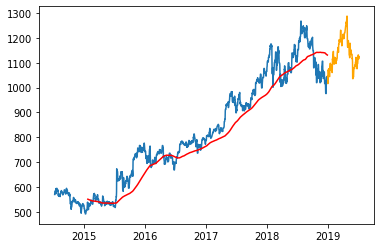

In [ ]:
# média móvel dos últimos 200 dias
moving_avg = train_ts.rolling(window=200).mean()
plt.plot(train_ts)
plt.plot(moving_avg, color='red')
plt.plot(test_ts, color='orange')

#### 5.1.3. Decomposição de Séries Temporais

Para um melhor entendimento da série temporal, é possível derivar diversos componentes que ajudam a descrever os vários fatores ou forças que afetam os valores de uma observação em uma série temporal. As quatro principais categorias dos componentes de séries temporais são:

- Tendência
- Sazonalidade
- Ciclicidade
- Movimentos aleatórios ou irregulares

Assim, é possível realizar a decomposição da série temporal principalmente para análise do seu comportamento e, como uma ferramenta de análise, pode ser usada como *feature* para informar os modelos de previsão sobre o seu problema.

A decomposição fornece uma maneira estruturada de pensar sobre um problema de previsão de série temporal, geralmente em termos de complexidade de modelagem e, especificamente, em termos de como melhor capturar cada um desses componentes em um determinado modelo.

##### Tendência (*trend*)

Os dados têm uma inclinação consistente para cima ou para baixo?

<img src = "https://i.imgur.com/QnqrSOo.png" width = 400>

##### Sazonalidade

O dado possui algum tipo de padrão sazonal?

<img src = "https://i.imgur.com/Izg45uj.png" width = 400>

##### Ciclicidade

Os dados possuem alguma ciclicidade aperiódica?

<img src = "https://i.imgur.com/fHrJaFl.png" width = 400>

A biblioteca `statsmodels` fornece uma implementação do método de decomposição clássica, em uma função chamada
[`seasonal_decompose`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html).

A biblioteca requer que você especifique se o modelo é aditivo ou multiplicativo. A principal diferença entre os dois modelos é que:
- Modelo aditivo: y(t) = Média + Tendência + Sazonalidade + Resíduo
- Modelo multiplicativo: y(t) = Média * Tendência * Sazonalidade * Resíduo

Veja como aplicar a decomposição de componentes nas células abaixo.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


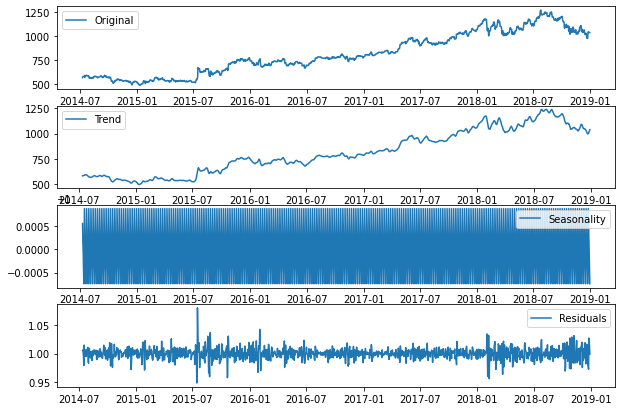

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# cria modelo
decomposition = seasonal_decompose(train_ts, model='multiplicative')  
# teste tambem com model='additive' e veja se você nota alguma diferença

# define os componentes
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# plots
plt.subplots(figsize=(10, 7))
plt.subplot(411)
plt.plot(train_ts, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

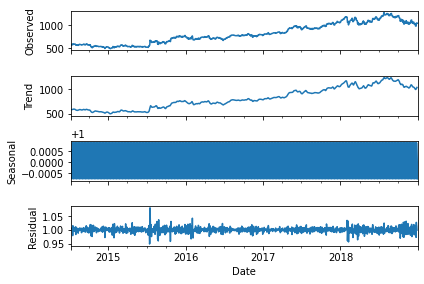

In [ ]:
# Outra forma possível de plotar a decomposição
decomposition.plot()
plt.show()

#### 5.1.4. Amortecimento Exponencial

O amortecimento exponencial é um método de previsão de série temporal para dados univariados (apenas uma variável) que pode ser estendido para dar suporte a dados com uma tendência sistemática ou componente sazonal. Os métodos de amortecimento exponencial são apropriados para dados não estacionários (ou seja, dados com tendência e dados sazonais).

> As previsões produzidas usando métodos de amortecimento exponencial são médias ponderadas de observações anteriores, com os pesos decaindo exponencialmente à medida que as observações envelhecem. Em outras palavras, quanto mais recente a observação, maior o peso associado.

— Página 171, [Forecasting: principles and practice](https://amzn.to/2xlJsfV), 2013.

A biblioteca `statsmodels` possui a implementação dessa técnica com o método [ExponentialSmoothing](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html).

Para se aprofundar nos diferentes parâmetros desse modelo e quando utilizá-lo, recomendamos a leitura desse artigos:
- [A Gentle Introduction to Exponential Smoothing for Time Series Forecasting in Python](https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/)
- [Time Series in Python — Exponential Smoothing and ARIMA processes](https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788)

In [ ]:
# importa biblioteca
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# cria classe
expsmoothing = ExponentialSmoothing(train_ts)

# fit do modelo
expsmoothing_fit = expsmoothing.fit()

# previsao
expsmoothing_yhat = expsmoothing_fit.predict(start=test_ts.index[0], end=test_ts.index[-1])

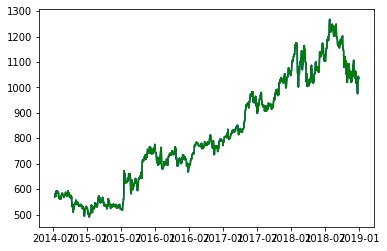

In [ ]:
# plot dos resultados nos dados de treino:
plt.plot(train_ts, color='blue')
plt.plot(expsmoothing_fit.predict(start=train_ts.index[0], end=train_ts.index[-1]), color='green')

In [ ]:
expsmoothing_yhat

2019-01-01    1035.609985
2019-01-02    1035.609985
2019-01-03    1035.609985
2019-01-04    1035.609985
2019-01-05    1035.609985
                 ...     
2019-07-05    1035.609985
2019-07-06    1035.609985
2019-07-07    1035.609985
2019-07-08    1035.609985
2019-07-09    1035.609985
Freq: D, Length: 190, dtype: float64

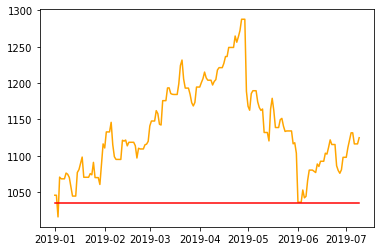

In [ ]:
# Plot da previsão nos dados de teste
plt.plot(test_ts, color='orange')
plt.plot(expsmoothing_yhat, color='red')

In [ ]:
# dataset para medir erro
exp_forecast = pd.concat([train_ts.append(test_ts),
                          expsmoothing_yhat.rename('yhat')], axis=1, sort=False)

exp_forecast.tail()

,y,yhat
Date,,
2019-07-05,1131.589966,1035.609985
2019-07-06,1116.349976,1035.609985
2019-07-07,1116.349976,1035.609985
2019-07-08,1116.349976,1035.609985
2019-07-09,1124.829956,1035.609985


In [ ]:
# função reutilizável para cálculo de erros
def calculate_forecast_errors(df, prediction_size):
    
    df = df.copy()
    
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    predicted_part = df[-prediction_size:]
    
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [ ]:
# métricas de erro
for err_name, err_value in calculate_forecast_errors(exp_forecast, len(test_ts)).items():
    print(err_name, err_value)

MAPE 8.678738937720926
MAE 101.4019628421052


#### 5.1.5. ARIMA

A classe de modelos ARIMA (*Autoregressive Integrated Moving Average*) modelam a previsão como uma função linear das observações diferenciadas e erros residuais em observações anteriores.

O ARIMA combina os modelos de Autorregressão (AR) e Média Móvel (MA), bem como uma etapa de pré-processamento de diferenciação da sequência para tornar a sequência estacionária, chamada integração (I).

De forma geral, os modelos ARIMA são caracterizados três parâmetros principais que devem serem ajustados, chamados de "ordem" do modelo:
- **Parâmetro d**: é um número inteiro que indica a ordem de diferenciação do modelo. É usado para retirar a estacionariedade dos dados
- **Parâmetro p**: é um número inteiro (ou uma lista de inteiros) que indica a ordem do termo AR (autorregressivo) do modelo
- **Parâmetro q**: é um número inteiro (ou uma lista de inteiros) que indica a ordem do termo de MA (média móvel) do modelo

Além disso, se a série temporal tem tendências sazonais, então é possível acrescentar termos sazonais e o modelo se torna SARIMA (abreviação para "*Seasonal ARIMA*").

Para maiores detalhes de como ajustar a ordem (p,d,q) de um modelo ARIMA, recomenda-se a leitura do artigo abaixo:
- [ARIMA Model – Complete Guide to Time Series Forecasting in Python](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/)

Os modelos ARIMA são mais flexíveis do que outros modelos estatísticos, tais como amortecimento exponencial ou uma simples regressão linear. Na verdade, alguns modelos de amortecimento exponencial são casos especiais dos modelos ARIMA. Por exemplo, um modelo simples de suavização exponencial é equivalente a um modelo ARIMA(0,1,1).

Assim, os modelos ARIMA são modelos relativamente mais simples do que modelos de *machine learning*, mas que conseguem ser flexíveis e capturar diversas relações complexas nos dados, apesar de não performarem muito bem com dados com grande oscilação em um curto intervalo de tempo.

Uma observação importante é que modelos ARIMA devem ser usados somente em séries estacionárias. Assim, deve-se remover a tendência dos dados antes de analisar a série. Para detalhes de como remover a estacionariedade de séries temporais, recomendamos essa leitura:
- [How to Make a Time Series Stationary in Python](https://analyzingalpha.com/make-time-series-stationary-python)

Em Python, a biblioteca `statsmodels` possui uma implemetação de modelos [`ARIMA`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html), que pode ser usada da seguinte forma:

In [ ]:
# importando a biblioteca
from statsmodels.tsa.arima_model import ARIMA

# fit do modelo
ar_model = ARIMA(train_ts, order=(1, 1, 1))  # especificando a ordem do ARIMA: order=(p, d, q)
ar_fit = ar_model.fit(disp=False)

# previsão
ar_yhat = ar_fit.predict(test_ts.index[0], test_ts.index[-1], typ='levels')

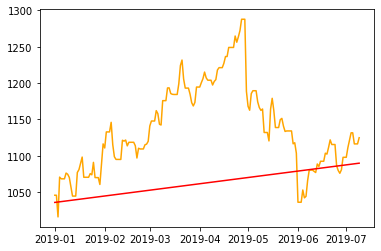

In [ ]:
# plot results
plt.plot(test_ts, color='orange')
plt.plot(ar_yhat, color='red')

In [ ]:
# dataset para medir erro
arima_forecast = pd.concat([train_ts.append(test_ts),
                            ar_yhat.rename('yhat')], axis=1, sort=False)

arima_forecast.tail()

,y,yhat
Date,,
2019-07-05,1131.589966,1088.719932
2019-07-06,1116.349976,1089.005170
2019-07-07,1116.349976,1089.290408
2019-07-08,1116.349976,1089.575646
2019-07-09,1124.829956,1089.860884


In [ ]:
# métricas de erro
for err_name, err_value in calculate_forecast_errors(arima_forecast, len(test_ts)).items():
    print(err_name, err_value)

MAPE 6.563933779576808
MAE 77.04669292606819


#### 5.1.6. Prophet

Como mencionado acima, o [Prophet](https://facebook.github.io/prophet/docs/quick_start.html) é uma ferramenta que foi construída pelo Facebook para lidar com séries temporais e fornece uma abordagem prática para previsões "em escala". O intuito da ferramenta é automatizar os recursos comuns de séries temporais de negócios, fornecendo métodos simples e ajustáveis para a análise e predição de séries temporais.

Dessa forma, o Prophet permite que analistas com diferentes níveis de conhecimento em Data Science consigam realizar mais previsões do que manualmente.

O pacote `Prophet` possui algumas maneiras específicas de lidar com os dados. Por exemplo, os dados de entrada devem ter apenas duas colunas chamadas `ds` e `y`.

In [ ]:
# ajuste do dataset de treino
train_prophet = train_ts.reset_index()
train_prophet.columns = ['ds', 'y']
train_prophet.head()

,ds,y
0,2014-07-10,569.536316
1,2014-07-11,577.594238
2,2014-07-12,583.268616
3,2014-07-13,583.268616
4,2014-07-14,583.268616


In [ ]:
# adjust do dataset de teste
test_prophet = test_ts.reset_index()
test_prophet.columns = ['ds', 'y']
test_prophet.head()

,ds,y
0,2019-01-01,1045.849976
1,2019-01-02,1045.849976
2,2019-01-03,1016.059998
3,2019-01-04,1070.709961
4,2019-01-05,1068.390015


In [ ]:
# imports
from fbprophet import Prophet

In [ ]:
# instancia prophet e treina
m = Prophet()
m.fit(train_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# construção do dataset de teste para alimentar o modelo
future = m.make_future_dataframe(periods=len(test_prophet))

# realiza previsão
forecast = m.predict(future)

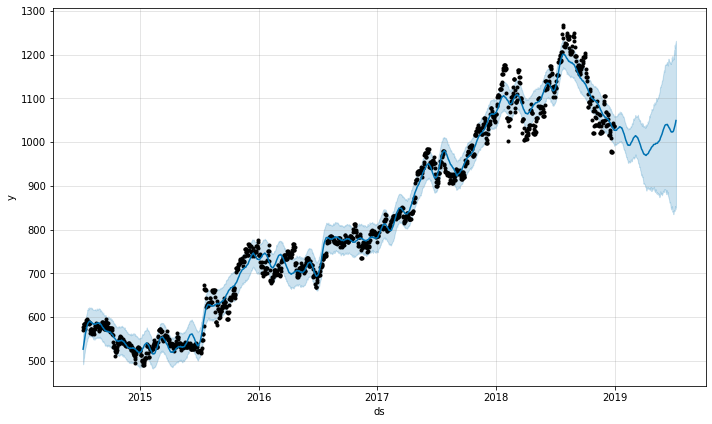

In [ ]:
# plot dos resultados
m.plot(forecast);

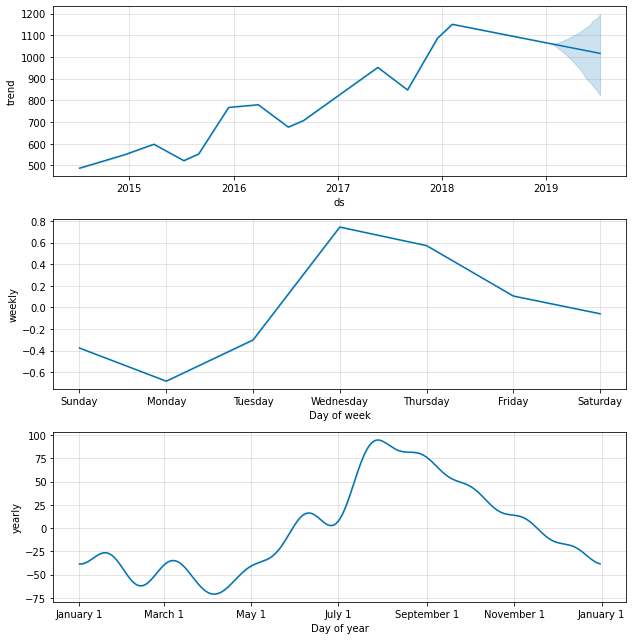

In [ ]:
# plot das componentes da série
m.plot_components(forecast);

In [ ]:
# função para construir dataset com valores históricos e previsão realizada
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [ ]:
# usa função para construir dataset
prophet_forecast = make_comparison_dataframe(train_prophet.append(test_prophet), forecast)

prophet_forecast.tail()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2019-07-05,1034.969029,842.839096,1221.988218,1131.589966
2019-07-06,1038.056639,853.784066,1215.578565,1116.349976
2019-07-07,1041.302952,845.811811,1224.109591,1116.349976
2019-07-08,1044.832143,850.045357,1227.349816,1116.349976
2019-07-09,1049.276231,850.608340,1231.624834,1124.829956


In [ ]:
# cálculo de erros
for err_name, err_value in calculate_forecast_errors(prophet_forecast, len(test_ts)).items():
    print(err_name, err_value)

MAPE 10.959555309432357
MAE 128.1155924361191


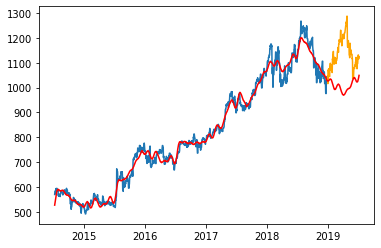

In [ ]:
# plot dos resultados
plt.plot(train_ts)
plt.plot(test_ts, color='orange')
plt.plot(prophet_forecast['yhat'], color='red')

E aí, que modelo você usaria? ARIMA, Amortecimento Exponencial ou os recursos do `Prophet`?

### 5.2. Métodos de Machine Learning

Até agora, aprendemos como realizar uma previsão apenas analisando os padrões da própria série temporal. No entanto, apesar de os modelos estatísticos, quando bem ajustados, conseguirem apresentar uma relativamente boa acurácia em muitas situações, eles apresentam limitações quando os dados apresentam um comporttamento mais complexo.

Além disso, se a série temporal que você deseja prever é fortemente influenciada por fatores externos (expressos na forma de variaveis causais), você deve utilizar outras técnicas que consigam levar em consideração essas relações de causalidade. Caso você tenha esquecido da diferença entre causalidade e correlação:

* **Correlação**: refere-se ao grau de associação entre duas variáveis aleatórias. Portanto, a correlação entre dois conjuntos de dados é o quanto eles se parecem. por exemplo: como o preço da ação de hoje está associada à de ontem?
* **Causalidade**: implica que A e B têm uma relação de causa e efeito um com o outro. Você está dizendo que A causa B. Por exemplo: como o crescimento da população afeta o preço da ação do google?

Assim, existem diversos modelos mais complexos que utilizam Machine Learning para realizar a previsão de dados com comportamentos mais complexos, ou até mesmo considerando diversas variáveis de entrada para a previsão.

#### 5.2.1. Modelos de regressão

Como vimos nessa aula, modelos de séries temporais consistem em problemas de regressão, mas com o tempo sendo uma variável do meu problema. Mesmo assim, a grande maioria de modelos de regressão vistos nas aulas passadas também são aplicáveis nos problemas de séries temporais desconsiderando o tempo.

A desvantagem dessa abordagem, como falamos, é que o tempo possui uma grande relevância com relação às séries temporais, uma vez que os dados de hoje em geral possuem forte correlação com os dados de ontem ou de períodos próximos, e menor correlação com tempos mais distantes.

Assim, os modelos de regressão que utilizamos vão tentar prever a variável de interesse com base nas variáveis de entrada, mas não vão considerar os dados de forma sequencial, onde os resultados de um dia influenciam nos resultados dos dias seguintes.

Para contornar isso, podemos adicionar features que representam alguma noção de tempo para ajudar no aprendizado dos modelos, como o dia da semana, se é final de semana ou não, qual é o período do dia, ... 

##### Exemplo

Vamos considerar o seguinte problema: você foi convidado por uma empresa de transporte queniana para construir um modelo para prever quantos passageiros vão estar em cada viagem de ônibus com destino a Nairóbi em sua programação.

Este é um concurso real de ciência de dados da [Zindi](https://zindi.africa/competitions/traffic-jam-predicting-peoples-movement-into-nairobi), uma plataforma de competição de ciência de dados com a missão de construir um ecossistema de ciência de dados na África. O dois conjuntos de dados usados neste notebook estão na pasta /data:

- [Nairobi Raw] 
- [Nairóbi Treated]

**Vamos utilizar um modelo de floresta aleatório (Random Forest)**, como aprendemos em aulas anteriores, para ver como ele performa nesse problema.

O dataset inicial fornecido pela companhia é o seguinte:

In [ ]:
# imports de blibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# carga dos dados
nairobi_raw = pd.read_csv("/mydrive/dados/nairobi_raw.csv", delimiter = ";", decimal = ",")
print(nairobi_raw.shape)
nairobi_raw.head()

(51645, 7)


,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,17/10/2017,07:15,Migori,Nairobi,Bus,49
1,14304,14/11/2017,05:10,Kisii,Nairobi,Bus,49
2,5437,19/11/2017,07:12,Migori,Nairobi,Bus,49
3,5710,26/11/2017,07:05,Keroka,Nairobi,Bus,49
4,5777,27/11/2017,07:10,Homa Bay,Nairobi,Bus,49


Como nosso conjunto de dados claramente não está pronto para ser utilizado por nosso algoritmo de aprendizado de máquina, faremos a preparação de alguns dados nele.

Podemos ver que temos mais de 50 mil observações e 7 variáveis. Mas onde está a variável que devemos prever, a quantidade de passageiros em cada viagem de ônibus? Cada viagem de ônibus tem um ID de viagem e cada observação neste conjunto de dados é o registro de um passageiro que comprou uma passagem para estar naquele ônibus. Portanto, vamos apenas agrupar os passageiros pelo ID da viagem! Problema resolvido? Quase lá.

Vamos remover a variável _travel_to_, pois todas as viagens são para Nairóbi. Além disso, vamos ajudar nosso **modelo de árvore de decisão** e criar algumas variáveis que indicam 4 intervalos de tempo diferentes para as viagens acontecerem. Esses intervalos foram criados mais ou menos com base na quantidade de viagens em cada hora do dia.

Portanto, este é nosso novo conjunto de dados após alguma transformação:

In [ ]:
# import da base de dados transformada
nairobi_treated = pd.read_csv("/mydrive/dados/nairobi_raw.csv", delimiter = ";", decimal = ",")

# vamos definir a data como o indide do dataset
nairobi_treated.index = nairobi_treated['travel_date']
nairobi_treated = nairobi_treated.iloc[:, 1:]

# prints das características do dataset
print(nairobi_treated.shape)
nairobi_treated.head()

(51645, 6)


,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
travel_date,,,,,,
17/10/2017,17/10/2017,07:15,Migori,Nairobi,Bus,49
14/11/2017,14/11/2017,05:10,Kisii,Nairobi,Bus,49
19/11/2017,19/11/2017,07:12,Migori,Nairobi,Bus,49
26/11/2017,26/11/2017,07:05,Keroka,Nairobi,Bus,49
27/11/2017,27/11/2017,07:10,Homa Bay,Nairobi,Bus,49


Agora que importamos e tratamos nosso dataset, vamos separar a variável objetivo das demais variávels. Nossa variável objetivo será `'nb_passengers'`, que é o número de passageiros em cada viagem.

In [ ]:
# separando variável objetivo
X, y = nairobi_treated.iloc[:, :-1], nairobi_treated.iloc[:, -1]

print("X", X.shape)
print(X.head())
print("y", y.shape)
print(y.head)

X (51645, 5)
            travel_date travel_time travel_from travel_to car_type
travel_date                                                       
17/10/2017   17/10/2017       07:15      Migori   Nairobi      Bus
14/11/2017   14/11/2017       05:10       Kisii   Nairobi      Bus
19/11/2017   19/11/2017       07:12      Migori   Nairobi      Bus
26/11/2017   26/11/2017       07:05      Keroka   Nairobi      Bus
27/11/2017   27/11/2017       07:10    Homa Bay   Nairobi      Bus
y (51645,)
<bound method NDFrame.head of travel_date
17/10/2017    49
14/11/2017    49
19/11/2017    49
26/11/2017    49
27/11/2017    49
              ..
20/04/2018    49
20/04/2018    49
20/04/2018    49
20/04/2018    49
20/04/2018    49
Name: max_capacity, Length: 51645, dtype: int64>


Como nós temos variáveis categóricas, vamos transformá-las em dummy:

In [ ]:
X = pd.get_dummies(X)
X.columns

Index(['travel_date_01/01/2018', 'travel_date_01/02/2018',
       'travel_date_01/03/2018', 'travel_date_01/04/2018',
       'travel_date_01/12/2017', 'travel_date_02/01/2018',
       'travel_date_02/02/2018', 'travel_date_02/03/2018',
       'travel_date_02/04/2018', 'travel_date_02/12/2017',
       ...
       'travel_from_Ndhiwa', 'travel_from_Nyachenge', 'travel_from_Oyugis',
       'travel_from_Rodi', 'travel_from_Rongo', 'travel_from_Sirare',
       'travel_from_Sori', 'travel_to_Nairobi', 'car_type_Bus',
       'car_type_shuttle'],
      dtype='object', length=247)

Agora vamos dividir nosso conjunto de dados em conjuntos de treinamento e teste. Definir _shuffle = False_ significa que dividiremos o treinamento e o teste seguindo a ordem das observações, que são classificadas por data.

In [ ]:
# import função train_test_split
from sklearn.model_selection import train_test_split

# usamos a função train_test_split para criar os sets de treino e teste
# define o tamanho do set de teste. Pode ser um inteiro (número de observações) ou então uma fração, correspondendo à proporção treino/teste
# suffle = False significa que a separação obedecerá a sequencia da data
X_training, X_test, y_training, y_test = train_test_split(X, y, 
                                                          test_size = 0.25, 
                                                          shuffle = False)

print("Train set X", X_training.shape)
print("Train set y", y_training.shape)
print("Test set X", X_test.shape)
print("Test set y", y_test.shape)
X_test.head()
X_test_backup = X_test

Train set X (38733, 247)
Train set y (38733,)
Test set X (12912, 247)
Test set y (12912,)


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


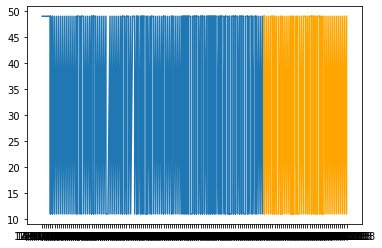

In [ ]:
# plot dos dados
plt.plot(y_training)
plt.plot(y_test, color='orange')

Para esse dataset, visualmente pode-se inferir que não existe muita correlação temporal entre os dados de passageiros ao longo do tempo. Então o uso de um modelo de regressão que não considera o tempo é justificável.

Agora, para realizar a validação cruzada, vamos explorar a técnica de divisão que aprendemos anteriormente nesta lição, usando a função TimeSeriesSplit. Nosso número de divisões será 10 e usaremos todo o histórico disponível para o conjunto de dados de treinamento.

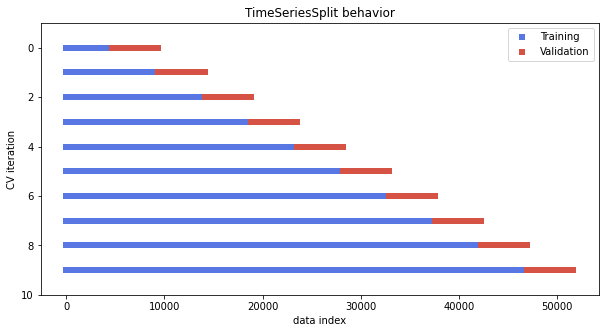

In [ ]:
# usando uma janela expansiva para a validação cruzada
from sklearn.model_selection import TimeSeriesSplit
cv = TimeSeriesSplit(n_splits=10)

# agrora plotando os conjuntos de dados da validação cruzada
fig, ax = plt.subplots(figsize=(10, 5))
for index, (X_train, X_test) in enumerate(cv.split(X)):
    # Plot training and test indices
    l1 = ax.scatter(X_train, [index] * len(X_train), c=[plt.cm.coolwarm(.1)], marker='_', lw=6)
    l2 = ax.scatter(X_test, [index] * len(X_test), c=[plt.cm.coolwarm(.9)], marker='_', lw=6)
    ax.set(ylim=[10, -1], title='TimeSeriesSplit behavior', xlabel='data index', ylabel='CV iteration')
    ax.legend([l1, l2], ['Training', 'Validation'])

Agora vamos treinar nosso modelo de árvore com `GridSearchCV` e a técnica de validação cruzada de divisão de série temporal. Como nosso conjunto de dados é relativamente grande e o `GridSearchCV` demoraria para ser executado (e demorou), já definimos os melhores parâmetros para você!

In [ ]:
# Importando as bibliotecas que vamos utilizar no modelo
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import (explained_variance_score, 
                             mean_absolute_error, 
                             mean_squared_error, 
                             mean_squared_log_error,
                             r2_score)
from sklearn.model_selection import GridSearchCV


 Best hyperparameters:
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Pontuação média nos dados de treino: 0.769 +/- 0.014
Pontuação média nos dados de validação: 0.756 +/- 0.021


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

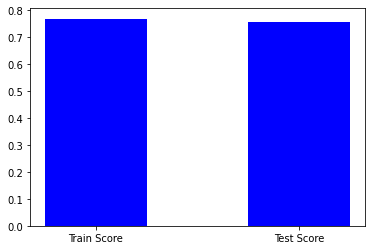

In [ ]:
# Random Forest com Validação cruzada e Grid Search para Séries temporais

# define os valores possíveis para os parâmetros a serem testados
params = {'n_estimators': [100, 500],
          'max_features': [3, 5],
          'max_depth': [5, 10]}

# cria modelo
rf_model_cv_gs = RandomForestRegressor()

# objeto para grid search com GridSearchCV
grid_search = GridSearchCV(rf_model_cv_gs, 
                           param_grid = params, 
                           return_train_score = True, 
                           cv = cv)

# treina modelo com Grid Search
grid_search.fit(X_training, y_training)

# imprime melhor combinação de hiperparâmetros
print('\n Best hyperparameters:')
print(grid_search.best_params_)

# resultados do cv
cv_results = pd.DataFrame(grid_search.cv_results_)

# print score médio nos sets de treino
print("Pontuação média nos dados de treino: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_train_score.values[0],
                                                                     cv_results[cv_results.rank_test_score == 1].std_train_score.values[0]))
# print score médio nos sets de validação
print("Pontuação média nos dados de validação: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0],
                                                                     cv_results[cv_results.rank_test_score == 1].std_test_score.values[0])) 

y = [cv_results[cv_results.rank_test_score == 1].mean_train_score.values[0], 
     cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0]]
x = ["Train Score", "Test Score"]
width = 1/2
plt.bar(x, y, width, color="blue")  

# seta melhor opção baseada nos hiperparâmetros
# utiliza as melhores opções de hiperparâmetros encontrados
rf_model_cv_gs.set_params(n_estimators = grid_search.best_params_['n_estimators'],
                           max_features = grid_search.best_params_['max_features'],
                           max_depth = grid_search.best_params_['max_depth'])

# treina modelo com todos os dados de treino disponíveis e com os melhores hiperparâmetros encontrados
rf_model_cv_gs.fit(X_training, y_training)

Vamos calcular o MAE para treino e teste:

In [ ]:
print("MAE train:", mean_absolute_error(y_training, rf_model_cv_gs.predict(X_training)))
print("MAE test:", mean_absolute_error(y_test, rf_model_cv_gs.predict(X_test_backup)))

MAE train: 8.859880247355859
MAE test: 8.451818128184426


#### 5.2.2 RNN e LSTM (Redes neurais recorrentes, ou *Recurrent neural networks*)

Em aulas anteriores vimos o funcionamento de modelos de redes neurais, que imitam o funcionamento do cérebro e, por meio de camadas com "neurônios" e pesos entre suas conexões, conseguem aprender e prever o resultado de tereminado input de dados.

Contudo, as redes neurais clássicas não consideram a relação sequencial que existem entre alguns tipos de dados, como séries temporais. Para resolver esse problema, foram criadas as Redes neurais recorrentes (ou RNNs).

Uma RNN pode ser imaginada como uma classe de redes neurais onde os nós são interligados e a saída de um nó é usada como entrada para o nó seguinte, em conjunto com a nova variável de input. Dessa forma, as RNNs podem armazenar informações ao processar novas entradas e essa capacidade de memória as torna ideais para tarefas de processamento onde as entradas anteriores devem ser consideradas (como dados de séries temporais).

<img src="https://i.imgur.com/nuiGgr6.png" width = 600>

Porém, percebeu-se que as RNNs clássiscas possuiam uma série de limitações, como a dificuldade de lembrar de características muito antigas. Para superar alguns dos problemas das RNNs, surgiram diversas variações. Uma delas é chamada LSTM ou Redes de memória de curto e longo prazo (*Long-Short Term Memory*), um tipo especial de RNN capaz de aprender dependências tanto de curto prazo quanto de longo prazo.

As LSTMs funcionam significativamente bem em uma grande variedade de problemas de dados sequenciais e são amplamente usados para a análise de séries temporais, análise de textos com NLP (*Natural Language Processing*), ou processamento de áudios.

Essa é uma breve introdução da ideia de redes neurais recorrentes. Para melhor entendimento do funcionamento das redes, sugerimos as fontes a seguir:
1. [Recurrent Neural Network Model](https://www.coursera.org/lecture/nlp-sequence-models/recurrent-neural-network-model-ftkzt): vídeo de 16 minutos que explica a teoria por trás das RNNs
2. [Understanding RNN and LSTM](https://aditi-mittal.medium.com/understanding-rnn-and-lstm-f7cdf6dfc14e): artigo do Medium explicando os conceitos básicos e matemáticos de uma RNN
3. [Prevendo valores de ações com LSTM](https://medium.com/neuronio-br/prevendo-valores-de-a%C3%A7%C3%B5es-com-lstm-b7b3a737aa4): artigo do Medium explicando a aplicação prática de LSTM em Python

<a id="digdeeper"></a>
## Saiba mais
- [An Overview of Autocorrelation, Seasonality and Stationarity in Time Series Data](https://analyticsindiamag.com/an-overview-of-autocorrelation-seasonality-and-stationarity-in-time-series-data/)
- [Forecasting: Principles and Practice](https://otexts.com/fpp3/)
- [Time Series Databases are Exploding in Popularity](https://www.techrepublic.com/article/why-time-series-databases-are-exploding-in-popularity/)
- [Application of Different Long Short-Term Memory Algorithms](https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/)
- [How (not) to use Machine Learning for time series forecasting: Avoiding the pitfalls](https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424)
- [Applied Forecasting for Business and Economics](https://robjhyndman.com/teaching/)
- [Time Series Forecast: A Basic Introduction Using Python](https://medium.com/@stallonejacob/time-series-forecast-a-basic-introduction-using-python-414fcb963000)
- [The Complete Guide to Time Series Analysis and Forecasting](https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775)
- [A Complete Guide to Time Series Data Visualization in Python](https://towardsdatascience.com/a-complete-guide-to-time-series-data-visualization-in-python-da0ddd2cfb01)
- [Time Series Forecast with Prophet](https://towardsdatascience.com/time-series-forecasting-with-prophet-54f2ac5e722e)
- [Facebook Prophet Webpage](https://research.fb.com/prophet-forecasting-at-scale/)
- [How to Rock Your Next Time Series Forecasting Project](https://medium.com/free-code-camp/how-to-rock-your-next-time-series-forecasting-project-3930d589f704)
- [An End-to-end Project on Time Series Forecasting](https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b)